K-Means Clustering

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Load dataset
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/processed/processed_train.csv')
df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0.814401,0.233626,0.132828,-0.015186,-0.311880,0.333710,0.216256,-0.165217,-0.279675,0.001896,0.220046,-0.250754,0.023256,-0.098973,-0.027108,-0.014240
1,0.788769,0.214497,0.126871,0.001028,-0.360252,0.424255,0.208152,0.141608,0.328986,0.056779,-0.144269,-0.108526,-0.155290,-0.085865,0.077608,-0.107197
2,0.786633,0.233628,0.162003,-0.008777,-0.408683,0.422581,0.207997,-0.058942,-0.019996,0.252224,0.267590,0.198441,0.027936,-0.106465,-0.125444,-0.104068
3,0.792041,0.239691,0.151408,-0.005893,-0.376406,0.378263,0.252594,-0.091477,-0.117862,0.072759,-0.146978,0.012128,0.144868,0.039337,0.053666,0.134730
4,0.790116,0.234139,0.139443,0.004712,-0.392245,0.447621,0.197345,-0.009376,0.306702,0.040068,-0.076781,-0.106108,-0.018365,0.093827,-0.024956,0.131445


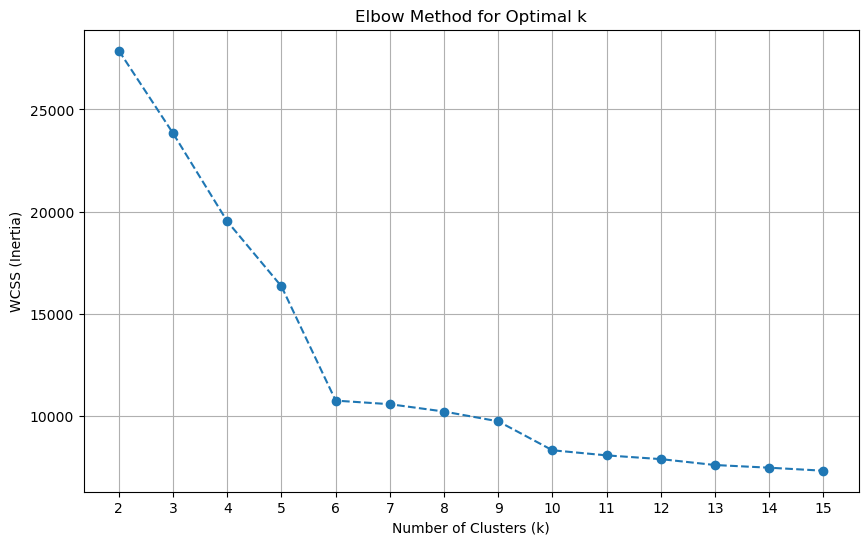

In [17]:
# Determine the Optimal Number of Clusters (k)

# Method A: Elbow Method (using Inertia/WCSS)
wcss = [] # Within-Cluster Sum of Squares
k_range = range(2, 16) # Test k values from 2 up to 15

for k in k_range:
    kmeans_test = KMeans(n_clusters=k,
                         init='k-means++', # Recommended initialization method
                         n_init='auto',    # Automatically run multiple initializations
                         random_state=42)  # For reproducibility
    kmeans_test.fit(df)
    wcss.append(kmeans_test.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()




Calculated Silhouette Score for k=2: 0.1857
Calculated Silhouette Score for k=3: 0.2564
Calculated Silhouette Score for k=4: 0.3321
Calculated Silhouette Score for k=5: 0.3866
Calculated Silhouette Score for k=6: 0.4891
Calculated Silhouette Score for k=7: 0.4034
Calculated Silhouette Score for k=8: 0.3863
Calculated Silhouette Score for k=9: 0.3078
Calculated Silhouette Score for k=10: 0.3348


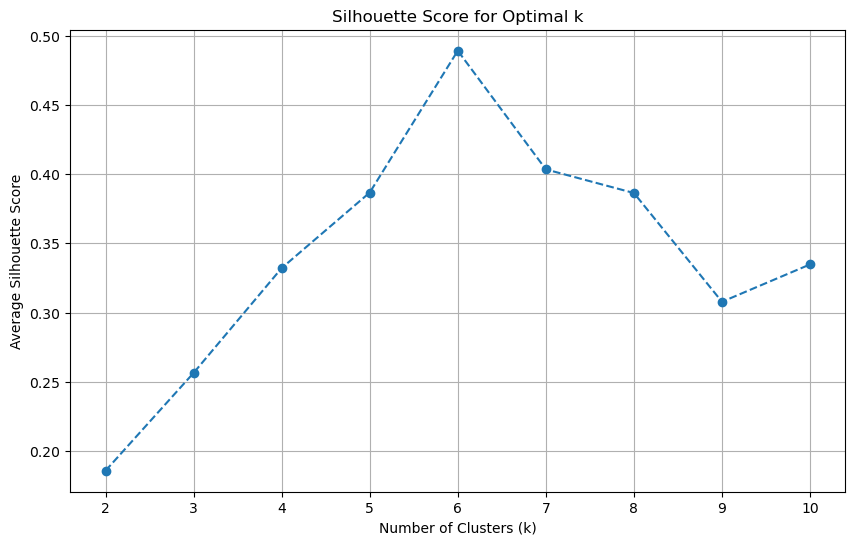

In [19]:
# Method B: Silhouette Score
silhouette_scores = []
k_range_silhouette = range(2, 11) # Test fewer k values due to computation time

for k in k_range_silhouette:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    cluster_labels = kmeans_test.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Calculated Silhouette Score for k={k}: {silhouette_avg:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


In [22]:
# Choose k and Run K-Means Clustering

chosen_k = 6

kmeans = KMeans(n_clusters=chosen_k,
                init='k-means++',
                n_init='auto',
                max_iter=300, # Default is 300, adjust if needed
                random_state=42)

# Fit the model and predict cluster labels
clusters = kmeans.fit_predict(df)

print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")

Cluster centers shape: (6, 16)


In [27]:
#  Add Cluster Labels to DataFrame

df['cluster'] = clusters
print(df.head())

# Analyze cluster sizes
print(df['cluster'].value_counts().sort_index())

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns.drop('cluster')) # Use original feature names
print(centroids_df)

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  0.814401  0.233626  0.132828 -0.015186 -0.311880  0.333710  0.216256   
1  0.788769  0.214497  0.126871  0.001028 -0.360252  0.424255  0.208152   
2  0.786633  0.233628  0.162003 -0.008777 -0.408683  0.422581  0.207997   
3  0.792041  0.239691  0.151408 -0.005893 -0.376406  0.378263  0.252594   
4  0.790116  0.234139  0.139443  0.004712 -0.392245  0.447621  0.197345   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
0 -0.165217 -0.279675  0.001896  0.220046 -0.250754  0.023256 -0.098973   
1  0.141608  0.328986  0.056779 -0.144269 -0.108526 -0.155290 -0.085865   
2 -0.058942 -0.019996  0.252224  0.267590  0.198441  0.027936 -0.106465   
3 -0.091477 -0.117862  0.072759 -0.146978  0.012128  0.144868  0.039337   
4 -0.009376  0.306702  0.040068 -0.076781 -0.106108 -0.018365  0.093827   

      PC_15     PC_16  cluster  
0 -0.027108 -0.014240        2  
1  0.077608 -0.107197        2  